# <p style="background:#40180D;color:#ffffff; text-align:center;font-size:24px;padding:10px;font-family:Sans-serif"> Recommender System - Anime Shows Ratings Analysis with genre Multilabel Binarizer</p>
**Objective:**
The objective of this assignment is to implement a recommendation system using cosine similarity on an anime dataset :ingUse the Anime Dataset which contains information about various anime, including their titles, genres,No.of episodes and user ratings e
sai.stem and identify areas of improvement.


**Author :** Prasad Desai

### <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:Sans-Serif;font-size:20px;font-weight:500">Import required libraries</p>

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity

### <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:Sans-Serif;font-size:20px;font-weight:500">Load Dataset</p>

In [231]:
df = pd.read_csv('anime.csv')
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.260000,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.250000,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.170000,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.160000,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.150000,211
12290,5543,Under World,Hentai,OVA,1,4.280000,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.880000,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.980000,175


### <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:Sans-Serif;font-size:20px;font-weight:500">Basic EDA</p>

In [232]:
df.shape

(12294, 7)

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [234]:
df['genre'].value_counts()

genre
Hentai                                                  823
Comedy                                                  523
Music                                                   301
Kids                                                    199
Comedy, Slice of Life                                   179
                                                       ... 
Adventure, Drama, Fantasy, Game, Sci-Fi                   1
Adventure, Demons, Fantasy, Historical                    1
Action, Comedy, Drama, Mecha, Music, Sci-Fi, Shounen      1
Action, Comedy, Fantasy, Mecha, Sci-Fi, Shounen           1
Hentai, Slice of Life                                     1
Name: count, Length: 3264, dtype: int64

In [235]:
df['rating'].value_counts()

rating
6.000000    141
7.000000     99
6.500000     90
6.250000     84
5.000000     76
           ... 
3.470000      1
3.710000      1
3.870000      1
3.910000      1
3.140000      1
Name: count, Length: 598, dtype: int64

In [236]:
# Round up to 1 decimal place
df['rating'] = np.ceil(df['rating'] * 10) / 10
print(df['rating'].value_counts())

rating
6.800000     566
6.500000     523
6.400000     521
6.600000     513
6.700000     503
            ... 
1.700000       1
2.500000       1
2.400000       1
9.600000       1
10.000000      1
Name: count, Length: 77, dtype: int64


Here we have rating provided with 2 decimals int he dataset, when we taken the value count for the rating the lenght of the value counts numbers is around 598. So we converted the ratign to one decimals which reduced the lenght of the value counts of the ratings to 77 which is very helpful by rounding up the ratings to proper format. 

In [237]:
## Finding unique Anime ID
print(df.anime_id.unique())
len(df.anime_id.unique())

[32281  5114 28977 ...  5621  6133 26081]


12294

In [238]:
df.duplicated().sum()

0

**Key Insights :** 
* There is no existance of duplicate record

In [239]:
## Finding unique members
print(df.members.unique())
len(df.members.unique())

[200630 793665 114262 ...  27411  57355    652]


6706

<span style="background-color:green;;f;padding:10px; margin:0;"> **Key Insights :** </span>
* We can find that there are 6706 unique members

In [240]:
# Convert 'episodes' to numeric (handle 'Unknown') and replacing na values with median
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce')
df['episodes'] = df['episodes'].fillna(df['episodes'].median())

#### Handeling missing values 

In [241]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [242]:
df['genre'].mode()

0    Hentai
Name: genre, dtype: object

In [243]:
df['type'].mode()

0    TV
Name: type, dtype: object

In [244]:
df['rating'].mean()

6.516901525198938

In [245]:
## We will replave the nul values for genre and type with mode and for rating with mean
df['genre'] = df['genre'].fillna('Hentai')
df['type'] = df['type'].fillna('TV')
df['rating'] = df['rating'].fillna(df['rating'].mean())

In [246]:
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

### <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:Sans-Serif;font-size:20px;font-weight:500">Dataset Summary</p>

In [247]:
df.describe()

,anime_id,episodes,rating,members
count,12294.000000,12294.000000,12294.000000,12294.000000
mean,14058.221653,12.095412,6.516902,18071.338864
std,11455.294701,46.244062,1.018410,54820.676925
min,1.000000,1.000000,1.700000,5.000000
25%,3484.250000,1.000000,5.900000,225.000000
50%,10260.500000,2.000000,6.600000,1550.000000
75%,24794.500000,12.000000,7.200000,9437.000000
max,34527.000000,1818.000000,10.000000,1013917.000000


In [248]:
df.describe(include=object)

,name,genre,type
count,12294,12294,12294
unique,12292,3264,6
top,Shi Wan Ge Leng Xiaohua,Hentai,TV
freq,2,885,3812


### <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:Sans-Serif;font-size:20px;font-weight:500">Data Processing - Cosine Similarity</p>
<p style="font-size:16px;">We will create a sparse matrix to find a cosine similarity, we will convert the data using pivot table, selecting index as members, columns as anime names and values contains ratings</p>

In [249]:
df['genre']

0                     Drama, Romance, School, Supernatural
1        Action, Adventure, Drama, Fantasy, Magic, Mili...
2        Action, Comedy, Historical, Parody, Samurai, S...
3                                         Sci-Fi, Thriller
4        Action, Comedy, Historical, Parody, Samurai, S...
                               ...                        
12289                                               Hentai
12290                                               Hentai
12291                                               Hentai
12292                                               Hentai
12293                                               Hentai
Name: genre, Length: 12294, dtype: object

We have the genre column is multi label format. we will use multilabelbinarizer to encode the data for genre column

In [250]:
# Multi-label binarization for genres
mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb.fit_transform(df['genre']),
                             columns=mlb.classes_,
                             index=df.index)

In [251]:
genre_encoded

,,",",-,A,C,D,E,F,G,H,...,n,o,p,r,s,t,u,v,w,y
0,1,1,0,0,0,1,0,0,0,0,...,1,1,1,1,0,1,1,0,0,0
1,1,1,0,1,0,1,0,1,0,0,...,1,1,0,1,1,1,1,1,0,1
2,1,1,1,1,1,0,0,1,0,1,...,1,1,0,1,1,1,1,0,0,1
3,1,1,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,1,1,1,0,0,1,0,1,...,1,1,0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
12290,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
12291,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
12292,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


We can see almost 41 genre columns are created using encoding, now we will combine these with the ratings feature to process the  further

In [252]:
# Combine genres + rating as features
features = pd.concat([genre_encoded, df[['rating']]], axis=1)

In [253]:
features

,,",",-,A,C,D,E,F,G,H,...,o,p,r,s,t,u,v,w,y,rating
0,1,1,0,0,0,1,0,0,0,0,...,1,1,1,0,1,1,0,0,0,9.400000
1,1,1,0,1,0,1,0,1,0,0,...,1,0,1,1,1,1,1,0,1,9.300000
2,1,1,1,1,1,0,0,1,0,1,...,1,0,1,1,1,1,0,0,1,9.300000
3,1,1,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,9.200000
4,1,1,1,1,1,0,0,1,0,1,...,1,0,1,1,1,1,0,0,1,9.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,4.200000
12290,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,4.300000
12291,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,4.900000
12292,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,5.000000


In [254]:
# Map anime names to indices
anime_indices = pd.Series(df.index, index=df['name']).drop_duplicates()
anime_indices

name
Kimi no Na wa.                                            0
Fullmetal Alchemist: Brotherhood                          1
Gintama°                                                  2
Steins;Gate                                               3
Gintama&#039;                                             4
                                                      ...  
Toushindai My Lover: Minami tai Mecha-Minami          12289
Under World                                           12290
Violence Gekiga David no Hoshi                        12291
Violence Gekiga Shin David no Hoshi: Inma Densetsu    12292
Yasuji no Pornorama: Yacchimae!!                      12293
Length: 12294, dtype: int64

### <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:Sans-Serif;font-size:20px;font-weight:500">Recommendation System:</p>
* Design a function to recommend anime based on cosine similarity.* 
Given a target anime, recommend a list of similar anime based on cosine similarity scores
* 
Experiment with different threshold values for similarity scores to adjust the recommendation list size




In [255]:
def recommend_anime(name, top_n=10, sim_threshold=0.5):

    if name not in anime_indices:
        return f"'{name}' not found in anime list."

    idx = anime_indices[name]
    target_vector = features.iloc[idx].values.reshape(1, -1)

    # Calculating cosine similarity
    sim_scores = cosine_similarity(target_vector, features).flatten()

    # Filtering out the anime itself and apply threshold
    sim_scores = [(i, score) for i, score in enumerate(sim_scores) if i != idx and score >= sim_threshold]
    
    # Sortint anime by score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[:top_n]
    
    # Get the recommended anime names
    top_indices = [i[0] for i in sim_scores]
    return df['name'].iloc[top_indices].tolist()

In [256]:
recommend_anime('Steins;Gate')

['Steins;Gate Movie: Fuka Ryouiki no Déjà vu',
 'Steins;Gate: Oukoubakko no Poriomania',
 'Steins;Gate: Kyoukaimenjou no Missing Link - Divide By Zero',
 'Steins;Gate 0',
 'Classroom☆Crisis',
 'Sakasama no Patema',
 'Dimension W: W no Tobira Online',
 'Classroom☆Crisis Special',
 'Alien 9',
 'Muteki Koujin Daitarn 3']

### <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:Sans-Serif;font-size:20px;font-weight:500">Evaluation</p>
* Split the dataset into training and testing sets.* 
Evaluate the recommendation system using appropriate metrics such as precision, recall, and F1-score
* 
Analyze the performance of the recommendation system and identify areas of improvement.


Using train test split for dividing data in train and test data 

In [257]:
features

,,",",-,A,C,D,E,F,G,H,...,o,p,r,s,t,u,v,w,y,rating
0,1,1,0,0,0,1,0,0,0,0,...,1,1,1,0,1,1,0,0,0,9.400000
1,1,1,0,1,0,1,0,1,0,0,...,1,0,1,1,1,1,1,0,1,9.300000
2,1,1,1,1,1,0,0,1,0,1,...,1,0,1,1,1,1,0,0,1,9.300000
3,1,1,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,9.200000
4,1,1,1,1,1,0,0,1,0,1,...,1,0,1,1,1,1,0,0,1,9.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,4.200000
12290,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,4.300000
12291,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,4.900000
12292,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,5.000000


In [258]:
# Split anime dataset into training and testing
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.4, random_state=42)

In [259]:
# Building training feature matrix on train data
mlb = MultiLabelBinarizer()
train_genres = pd.DataFrame(mlb.fit_transform(train_df['genre']), columns=mlb.classes_, index=train_df.index)
train_features = pd.concat([train_genres, train_df[['rating']]], axis=1)
train_features 

,,",",-,A,C,D,E,F,G,H,...,o,p,r,s,t,u,v,w,y,rating
6627,1,1,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,6.100000
8304,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,4.500000
1278,1,1,0,1,1,0,0,0,0,0,...,1,0,1,1,1,1,1,0,1,7.600000
7453,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,5.500000
9990,1,1,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,6.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,1,1,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,5.900000
5191,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,1,1,0,0,6.600000
5390,1,1,1,1,0,0,0,1,0,0,...,1,1,1,0,1,1,1,0,1,6.500000
860,1,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,7.800000


In [260]:
# Creating index map from training set
train_indices = pd.Series(train_df.index, index=train_df['name']).drop_duplicates()
train_indices

name
Minna Agechau♡                                              6627
Chanda Gou                                                  8304
Detective Conan Movie 11: Jolly Roger in the Deep Azure     1278
Broots                                                      7453
Planetarium Chibi Maruko-chan, Hoshi ni Negai wo            9990
                                                           ...  
Milkyway                                                   11964
Tondemo Nezumi Daikatsuyaku                                 5191
Macross II: Lovers Again                                    5390
Aikatsu! Movie                                               860
Virus: Virus Buster Serge                                   7270
Length: 7376, dtype: int64

In [261]:
# Creating a Recommendation function using training set only 
def recommend_from_train(name, top_n=10, threshold=0.5):
    if name not in train_indices:
        return f"'{name}' not found in training data."
    
    idx = train_indices[name]
    target_vector = train_features.loc[idx].values.reshape(1, -1)
    
    sim_scores = cosine_similarity(target_vector, train_features).flatten()
    sim_scores = [(i, score) for i, score in enumerate(sim_scores) if i != idx and score >= threshold]
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[:top_n]
    
    top_indices = [i[0] for i in sim_scores]
    return train_df['name'].iloc[top_indices].tolist()

In [262]:
 recommend_from_train('Death Note')

['Death Note',
 'Death Note Rewrite',
 'Boku dake ga Inai Machi',
 'Mirai Nikki (TV)',
 'Jigoku Shoujo Futakomori',
 'Jigoku Shoujo',
 'Imawa no Kuni no Alice (OVA)',
 'Umineko no Naku Koro ni',
 'Kara no Kyoukai 4: Garan no Dou',
 'Another']

In [263]:
test_df

,anime_id,name,genre,type,episodes,rating,members
6329,17209,Suzy&#039;s Zoo: Daisuki! Witzy - Happy Birthday,Kids,Special,1.000000,6.200000,158
2167,173,Tactics,"Comedy, Drama, Fantasy, Mystery, Shounen, Supe...",TV,25.000000,7.400000,27358
2882,3616,Kamen no Maid Guy,"Action, Comedy, Ecchi, Super Power",TV,12.000000,7.200000,27761
4700,18799,Take Your Way,"Action, Music, Seinen, Supernatural",Music,1.000000,6.700000,1387
7258,18831,Rinkaku,"Dementia, Horror, Music",Music,1.000000,5.600000,606
...,...,...,...,...,...,...,...
9979,20005,Pinch to Punch,Comedy,TV,156.000000,5.800000,66
1027,7647,Arakawa Under the Bridge,"Comedy, Romance, Seinen",TV,13.000000,7.800000,162622
11927,4378,Hininden: Gauss,Hentai,OVA,1.000000,5.900000,1228
6193,3595,Kujakuou,"Action, Demons, Horror",OVA,3.000000,6.300000,949


In [264]:
# Evaluating on test set

def evaluate_on_test(top_n=10, threshold=0.5, sample_size=2400):
    true_positives = 0
    total_recommended = 0
    total_relevant = 0

    test_sample = test_df.sample(sample_size, random_state=42)

    for name in test_sample['name']:
        recommendations = recommend_from_train(name, top_n=top_n, threshold=threshold)
       # print(recommendations)
    
        if isinstance(recommendations, str):
            continue
        
        target_genres = set(test_df[test_df['name'] == name]['genre'].values[0])
       # print(target_genres)

        for rec in recommendations:
            rec_genres = set(train_df[train_df['name'] == rec]['genre'].values[0])
          #  print(rec_genres)
            if target_genres.intersection(rec_genres):
                true_positives += 1
            total_recommended += 1
        
        total_relevant += top_n

    # print(f'true_positives : {true_positives}')
    # print(f'total_recommended : {total_recommended}')
    # print(f'total_relevant : {total_relevant}')

    precision = true_positives / total_recommended if total_recommended > 0 else 0
    recall = true_positives / total_relevant if total_relevant > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall + 1e-8)

    return {
        'precision': round(precision, 3),
        'recall': round(recall, 3),
        'f1_score': round(f1, 3),
    }


In [265]:
evaluate_on_test(top_n=10, threshold=0.5)

{'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}

**Key insights:**
* precision 1 indicate the every item in the model idefied as positive is actualy positive that means no false positive.
* recall value as 1 indicates model is identifying all positive items
* F1 score value 1 indicates a balanced measure of a model's performance, when both precision and recall are 1, the F1 score will also be 1, indicating a perfect model
* A perfect F1 score of 1 implies that the model is both very accurate (high precision) and very thorough (high recall) in its classification. 

### <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:Sans-Serif;font-size:20px;font-weight:500">Visualization</p>

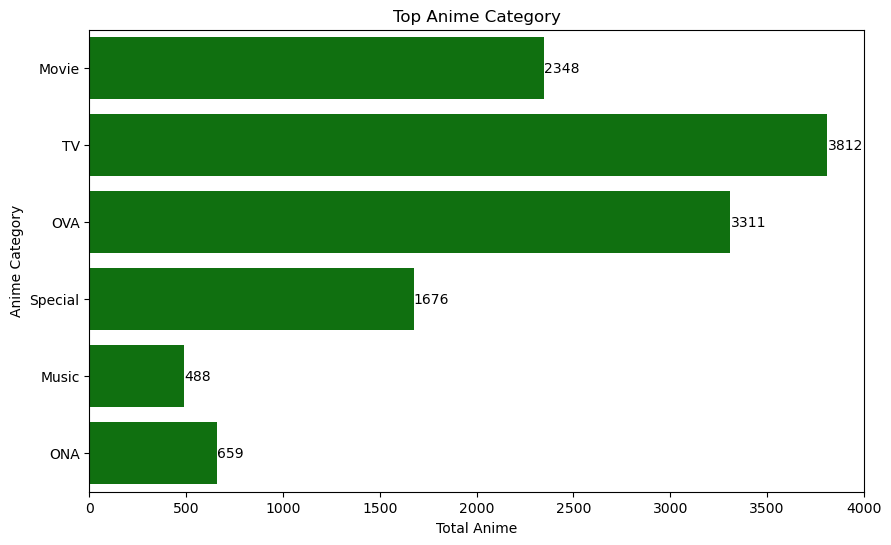

In [266]:
plt.figure(figsize=(10,6))
ax = sns.countplot(y = df['type'],color='green')
ax.bar_label(ax.containers[0])
plt.title("Top Anime Category")
plt.xlabel("Total Anime")
plt.ylabel("Anime Category")
plt.show()

**Key Insights :**
* Anime category TV streams almost 3787 anime shows which are the highest anime shows category which is 30.80% of total anime.
* OVA streams 3311 animes shows which are second highest anime show, which is 26.93% of total anime
* Anime category Movies streams 2348 animes, which is 19.09% of total anime
* Special anime category streams 1676 anime shows, which is 13.63% of total anime shows
* And Lastly ONA And Music categories streams around 659 shows which is 5.36% and 488 music shows which is 3.96% of total anime 


In [267]:
top_anime = df.sort_values(['members'], ascending=False)
top_anime

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37.000000,8.800000,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25.000000,8.600000,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25.000000,7.900000,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.000000,9.300000,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13.000000,8.400000,717796
...,...,...,...,...,...,...,...
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1.000000,10.000000,13
10424,33320,Suijun Genten,Hentai,Movie,1.000000,7.000000,13
10444,34490,Sushi Azarashi,Comedy,TV,30.000000,3.000000,12
10990,34485,Ganko-chan,Hentai,TV,2.000000,6.516902,11


In [268]:
top_anime['members'][:14]

40     1013917
86      896229
804     893100
1       793665
159     717796
19      715151
841     683297
3       673572
445     657190
131     633817
582     624055
760     623511
449     618056
118     602291
Name: members, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_3324\3410354455.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_anime, x=top_anime["name"][:13],y=top_anime["members"], palette='viridis')


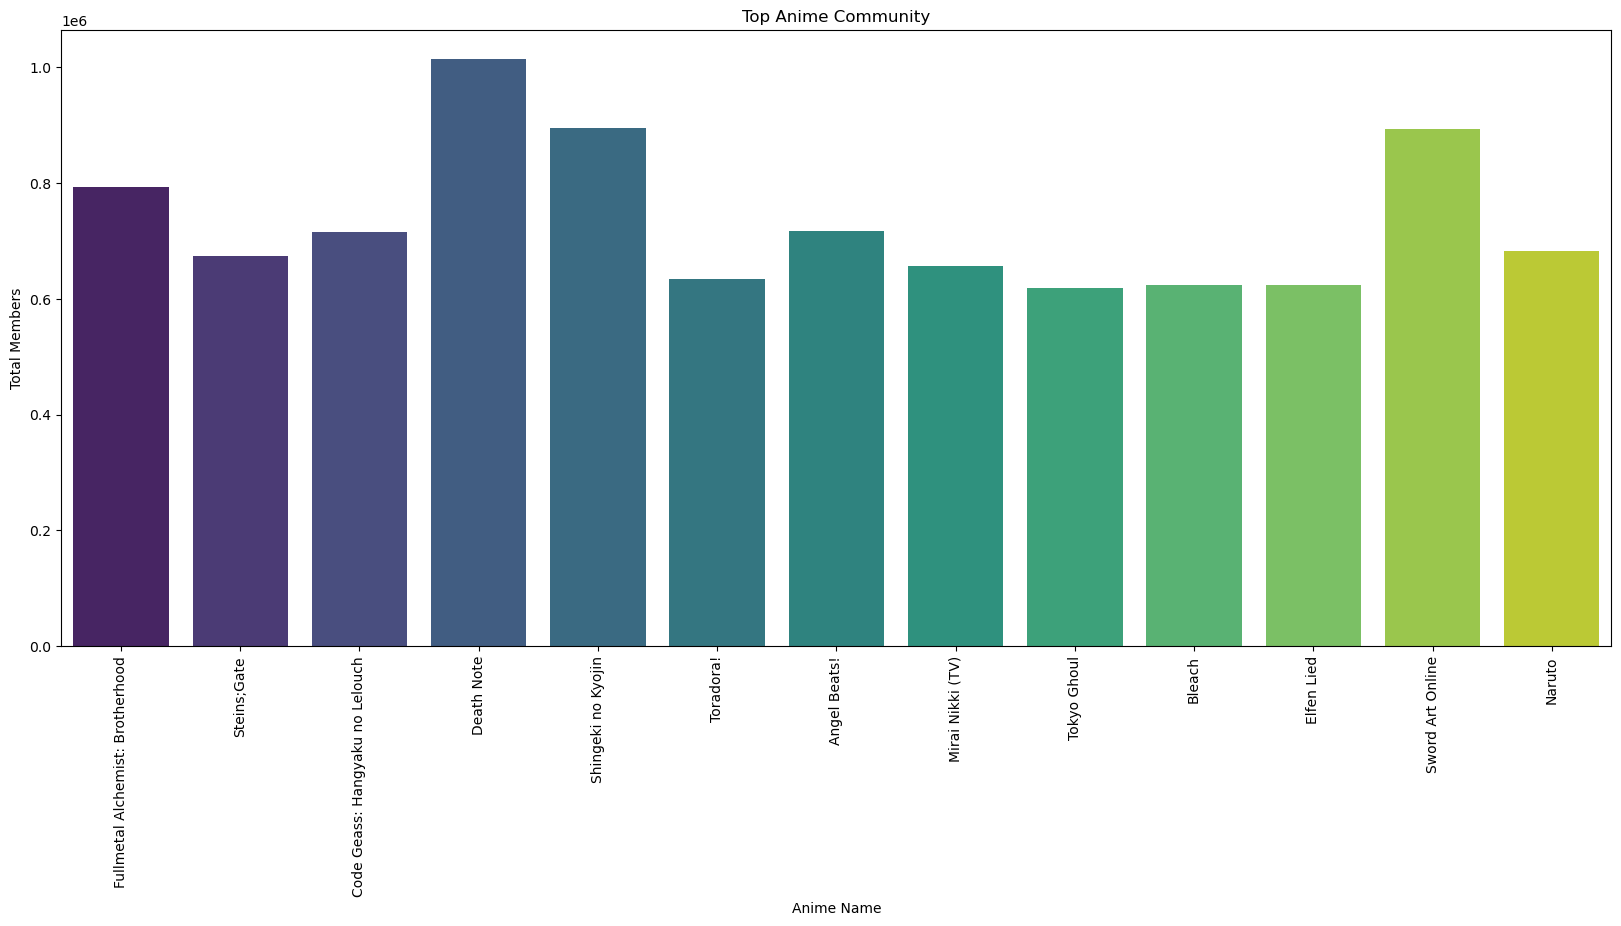

In [269]:
order = top_anime['members'][:14]
plt.figure(figsize=(20,8))
sns.barplot(data=top_anime, x=top_anime["name"][:13],y=top_anime["members"], palette='viridis')
plt.title("Top Anime Community")
plt.xlabel("Anime Name")
plt.ylabel("Total Members")
plt.xticks(rotation=90)
plt.show()

**Key Insights :**
  * **Death Note** is the highest watched and popular anime show by community members followed by **Shingeki no Kyojin** and **Sword Art On**

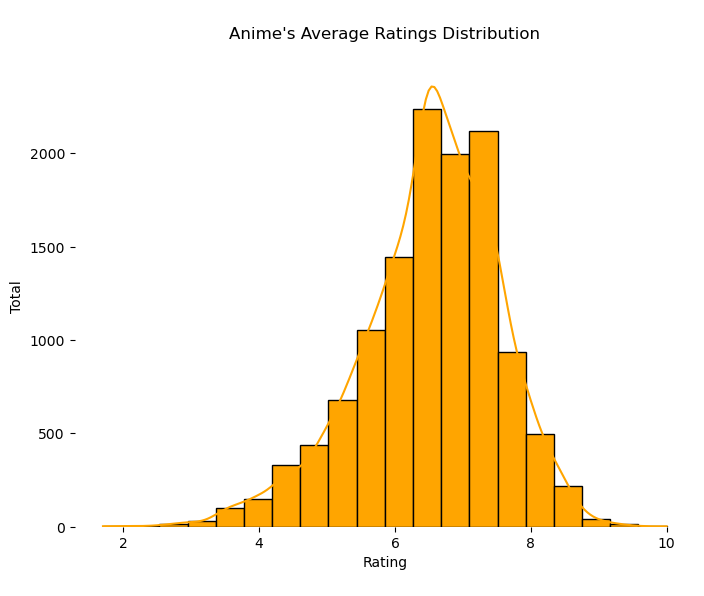

In [270]:
plt.figure(figsize=(8,6))
plt.tight_layout(pad=6.0)
top_anime_temp2 = df.sort_values(['rating'],ascending=False)
sns.histplot(top_anime_temp2["rating"],kde=True,bins=20,alpha=1,fill=True,color='orange')
plt.title("\nAnime's Average Ratings Distribution\n")
plt.xlabel("Rating\n")
plt.ylabel("Total")
sns.despine(left=True, bottom=True)
plt.show()

**Key Insights :**
* Most of the anime ratings lies between nearly 5.5 to 8.0
* The distribution of the data is left skewed

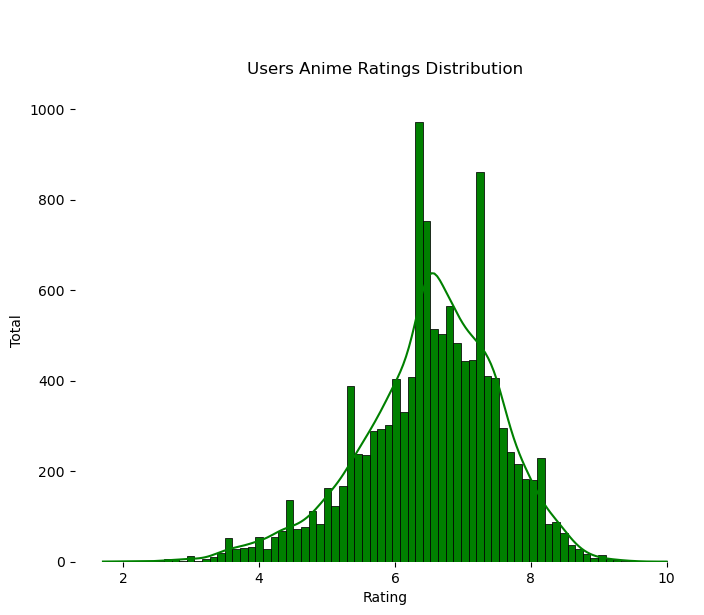

In [271]:
plt.figure(figsize=(8,6))
plt.tight_layout(pad=6.0)
sns.histplot(df["rating"],color='green',kde=True,bins="auto",alpha=1,fill=True)
plt.title("\n\n\nUsers Anime Ratings Distribution\n")
plt.xlabel("Rating")
plt.ylabel("Total")
sns.despine(left=True, bottom=True)
plt.show()

**Key Insights :**
* Most of the users ratings are spread between 6.0 - 8.0* The mode of the users ratings distribution is around 6.0 - 7.0
* Thehe distribution are left skewed